In [1]:
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X=df_wine.iloc[:,1:]
y=df_wine.iloc[:,0]

sc=StandardScaler()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.fit_transform(X_test)

In [31]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
cov_mat=np.cov(X_train_std.T)
eigen_vals,eigen_vecs=np.linalg.eig(cov_mat)

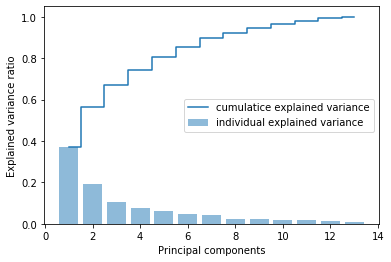

In [33]:
# 固有値の合計を求める
tot=sum(eigen_vals)
# 固有値（新しい基底に対するデータの分散）が大きい順に並べる
var_exp=[(i/tot) for i in sorted(eigen_vals,reverse=True)]
# 累積和を求める
cum_var_exp=np.cumsum(var_exp)
plt.bar(range(1,X.shape[1]+1),var_exp,alpha=0.5,align='center',label='individual explained variance')
plt.step(range(1,X.shape[1]+1),cum_var_exp,where='mid',label='cumulatice explained variance')
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')
plt.legend(loc='best')
plt.show()

In [86]:
# 固有値と固有ベクトルの組のタプルを作成。eigen_vecの各列が固有ベクトルに対応する
eigen_pairs=[(np.abs(eigen_vals[i]),eigen_vecs[:,i]) for i in range(len(eigen_vals))]
# 固有値（分散）が大きい順に並び替える
eigen_pairs.sort(reverse=True)
# 射影行列を作成。それぞれの固有ベクトルを列とする行列
# eigen_pairs[0][1]で固有ベクトルを表し[:,np.newaxis]で列ベクトルに変換している
w=np.hstack((eigen_pairs[0][1][:,np.newaxis],eigen_pairs[1][1][:,np.newaxis]))
w

array([[ 0.12959991,  0.49807323],
       [-0.24464064,  0.23168482],
       [-0.01018912,  0.31496874],
       [-0.24051579, -0.02321825],
       [ 0.12649451,  0.25841951],
       [ 0.38944115,  0.1006849 ],
       [ 0.42757808,  0.02097952],
       [-0.30505669,  0.0399057 ],
       [ 0.30775255,  0.06746036],
       [-0.11027186,  0.53087111],
       [ 0.30710508, -0.27161729],
       [ 0.37636185, -0.16071181],
       [ 0.2811085 ,  0.36547344]])

In [87]:
X_train_pca=X_train_std.dot(w)

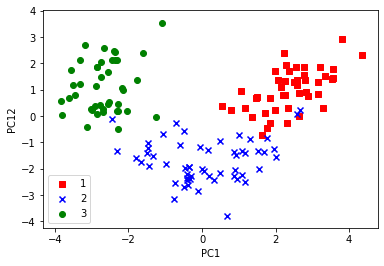

In [98]:
colors=['r','b','g']
markers=['s','x','o']

for l,c,m in zip(np.unique(y_train),colors,markers):
    plt.scatter(X_train_pca[y_train==l,0],X_train_pca[y_train==l,1],c=c,marker=m,label=l)

plt.xlabel('PC1')
plt.ylabel('PC12')
plt.legend(loc='lower left')
plt.show()

In [208]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

lr=LogisticRegression()
lr.fit(X_train_std,y_train)
print(lr.score(X_test_std,y_test))

pca=PCA(n_components=2)
X_train_pca=pca.fit_transform(X_train_std)
X_test_pca=pca.transform(X_test_std)

lr.fit(X_train_pca,y_train)
print(lr.score(X_test_pca,y_test))

X_std=sc.fit_transform(X)
pca.fit(X_std)

X_train_pca=pca.transform(X_train_std)
X_test_pca=pca.transform(X_test_std)

lr.fit(X_train_pca,y_train)
print(lr.score(X_test_pca,y_test))


1.0
0.9722222222222222
0.9722222222222222


/home/nagae/.conda/envs/gpu-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nagae/.conda/envs/gpu-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/nagae/.conda/envs/gpu-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nagae/.conda/envs/gpu-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/nagae/.conda/envs/gpu-env/lib/py

In [209]:
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [210]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X=df_wine.iloc[:,1:]
y=df_wine.iloc[:,0]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)

In [211]:
np.set_printoptions(precision=4)
mean_vecs=[]
for label in range(1,len(np.unique(y))+1):
    # axis=0とすることで各列の特徴量の平均値を取ることができる.なので返り値は特徴量数の長さの配列
    mean_vecs.append(np.mean(X_train_std[y_train==label],axis=0))
    print('MV %s: %s\n' %(label,mean_vecs[label-1]))

MV 1: [ 0.9198 -0.3075  0.3117 -0.7707  0.3571  0.9424  1.0813 -0.6109  0.5657
  0.1902  0.5024  0.8202  1.1967]

MV 2: [-0.8942 -0.418  -0.4675  0.2214 -0.2926 -0.0748  0.0313 -0.0577  0.1011
 -0.891   0.4644  0.292  -0.7087]

MV 3: [ 1.8548e-01  8.7684e-01  2.7821e-01  5.3578e-01  5.6683e-04 -9.1185e-01
 -1.1995e+00  7.3007e-01 -7.3855e-01  9.6293e-01 -1.1464e+00 -1.2612e+00
 -3.5417e-01]



In [212]:
pd.DataFrame(X_train_std[y_train==1]).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,0.919784,-0.307458,0.311705,-0.770701,0.357067,0.942440,1.081270,-0.610910,0.565706,0.190232,0.502353,0.820201,1.196739
std,0.557767,0.632308,0.869889,0.788751,0.705016,0.588455,0.417458,0.533613,0.706982,0.538255,0.489588,0.523128,0.722817
min,-0.167667,-0.920085,-1.216457,-2.435551,-0.779172,-0.096241,0.247661,-1.520697,-0.553449,-0.643002,-0.582053,-0.022591,-0.205908
25%,0.528567,-0.623169,-0.286163,-1.152904,-0.145320,0.559999,0.751528,-0.892054,0.091564,-0.229851,0.290904,0.394022,0.801646
50%,0.926414,-0.506202,0.160377,-0.803091,0.136392,0.888118,1.111433,-0.656312,0.532889,0.162220,0.509143,0.810634,1.065923
75%,1.336695,-0.380237,0.941824,-0.278372,0.770244,1.216238,1.358225,-0.341991,0.906318,0.486839,0.771030,1.227247,1.776165
max,2.194554,1.455243,3.174527,1.587296,1.967520,2.659965,1.841526,0.836715,2.298189,1.625111,1.425748,1.963262,2.658188


In [213]:
# クラス内変動行列S_Wを求める
d=X_train.shape[1]
S_W=np.zeros((d,d))
for label,mv in zip(range(1,len(np.unique(y_train)+1)),mean_vecs):
    class_scatter=np.zeros((d,d))
    for row in X_train_std[y_train==label]:
        # 変動行列を計算
        row,mv=row.reshape(d,1),mv.reshape(d,1)
        class_scatter+=(row-mv).dot((row-mv).T)
    S_W+=class_scatter

In [214]:
S_W.shape

(13, 13)

In [215]:
print('class label distribution: %s' % np.bincount(y_train)[1:])

class label distribution: [45 55 42]


In [222]:
#正規化した変動行列を求める。すなわち、共分散行列を求めることと同じ
d = X_train.shape[1]
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train == label].T)
    S_W += class_scatter
print('Scaled within-class scatter matrix: %sx%s' % (S_W.shape[0],
                                                     S_W.shape[1]))

Scaled within-class scatter matrix: 13x13


In [223]:
# クラス内変動行列を求める
mean_overall = np.mean(X_train_std, axis=0)
d =X_train.shape[1]
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train[y_train == i + 1].shape[0]
    mean_vec = mean_vec.reshape(d, 1)  # make column vector
    mean_overall = mean_overall.reshape(d, 1)  # make column vector
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)

print('Between-class scatter matrix: %sx%s' % (S_B.shape[0], S_B.shape[1]))

Between-class scatter matrix: 13x13


In [199]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [224]:
#固有値と固有ベクトルのペアを作成
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

#固有値が大きい順番に並び替え 
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)

print('Eigenvalues in decreasing order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in decreasing order:

544.9409138254811
187.26591131223122
4.853374971125164e-14
4.1281391006153586e-14
4.1281391006153586e-14
3.303972443675131e-14
3.303972443675131e-14
2.1762941134571637e-14
1.2907382852490287e-14
1.2907382852490287e-14
3.9813989247888525e-15
2.940593750158527e-15
0.0


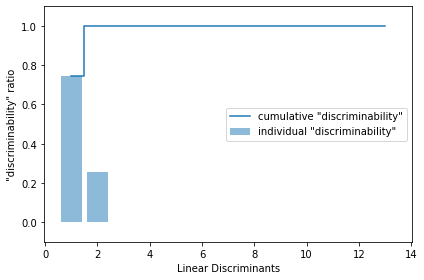

In [226]:
# 固有値の実数部の総和を求める
tot = sum(eigen_vals.real)
# 分散説明率と累積和を求める
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)

plt.bar(range(1, 14), discr, alpha=0.5, align='center',
        label='individual "discriminability"')
plt.step(range(1, 14), cum_discr, where='mid',
         label='cumulative "discriminability"')
plt.ylabel('"discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [227]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
              eigen_pairs[1][1][:, np.newaxis].real))
w

array([[-0.0816, -0.3969],
       [ 0.066 , -0.2356],
       [-0.03  , -0.3811],
       [ 0.1629,  0.3243],
       [ 0.0047, -0.0071],
       [ 0.2207,  0.0776],
       [-0.7881,  0.0992],
       [-0.0901,  0.0393],
       [ 0.0651,  0.206 ],
       [ 0.2012, -0.3168],
       [-0.0551,  0.2306],
       [-0.3749,  0.0273],
       [-0.3085, -0.5678]])

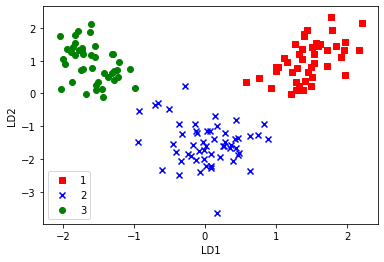

In [229]:
X_train_lda=X_train_std.dot(w)
colors=['r','b','g']
markers=['s','x','o']

for l,c,m in zip(np.unique(y_train),colors,markers):
    plt.scatter(X_train_lda[y_train==l,0]*-1,X_train_lda[y_train==l,1]*-1,c=c,marker=m,label=l)
    
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend(loc='lower left')
plt.show()

In [31]:
from scipy.spatial.distance import pdist,squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

def rbf_kernel_pca(X,gamma,n_components):
    # 行列のペアごとの平方ユークリッド距離を計算
    sq_dists=pdist(X,'sqeuclidean')
    # ペアごとの距離を正方行列に変換
    mat_sq_dists=squareform(sq_dists)
    # 対象カーネル行列
    K=exp(-gamma*mat_sq_dists)
    # カーネル行列を中心化
    N=K.shape[0]
    one_n=np.ones((N,N))/N
    K=K-one_n.dot(K)-K.dot(one_n)+one_n.dot(K).dot(one_n)
    # 固有値を取得
    eivgvals,eigvecs=eigh(K)
    # 上位k個の固有ベクトルを取得
    X_pc=np.column_stack((eigvecs[:,-i] for i in range(1,n_components+1)))
    
    # 対応する固有ベクトルを取得
    lambdas=[eivgvals[-i] for i in range(1,n_components+1)]
    
    return X_pc,lambdas

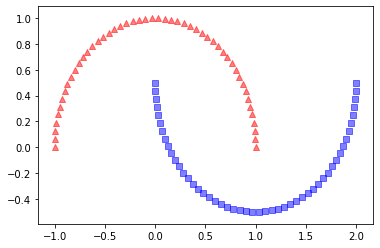

In [7]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
%matplotlib inline
X,y=make_moons(n_samples=100,random_state=123)
plt.scatter(X[y==0,0],X[y==0,1],c='red',marker='^',alpha=0.5)
plt.scatter(X[y==1,0],X[y==1,1],c='blue',marker='s',alpha=0.5)
plt.show()

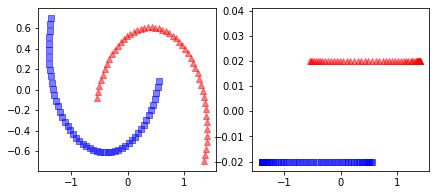

In [14]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
X_pca=pca.fit_transform(X)

fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(7,3))

ax[0].scatter(X_pca[y==0,0],X_pca[y==0,1],c='red',marker='^',alpha=0.5)
ax[0].scatter(X_pca[y==1,0],X_pca[y==1,1],c='blue',marker='s',alpha=0.5)

ax[1].scatter(X_pca[y==0,0],np.zeros((50,1))+0.02,c='red',marker='^',alpha=0.5)
ax[1].scatter(X_pca[y==1,0],np.zeros((50,1))-0.02,c='blue',marker='s',alpha=0.5)


plt.show()

C:\Users\nsats\Anaconda3\envs\gpu-env\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


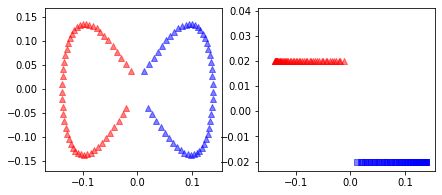

In [25]:
from matplotlib.ticker import FormatStrFormatter
X_kpca=rbf_kernel_pca(X,gamma=15,n_components=2)
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(7,3))
ax[0].scatter(X_kpca[y==0,0],X_kpca[y==0,1],color='red',marker='^',alpha=0.5)
ax[0].scatter(X_kpca[y==1,0],X_kpca[y==1,1],color='blue',marker='^',alpha=0.5)

ax[1].scatter(X_kpca[y==0,0],np.zeros((50,1))+0.02,c='red',marker='^',alpha=0.5)
ax[1].scatter(X_kpca[y==1,0],np.zeros((50,1))-0.02,c='blue',marker='s',alpha=0.5)

plt.show()

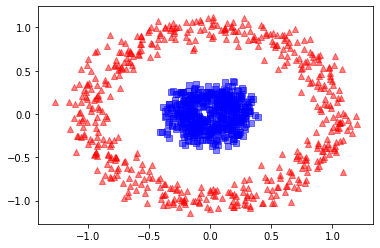

In [27]:
from sklearn.datasets import make_circles
X,y=make_circles(n_samples=1000,random_state=123,noise=0.1,factor=0.2)
plt.scatter(X[y==0,0],X[y==0,1],marker='^',color='red',alpha=0.5)
plt.scatter(X[y==1,0],X[y==1,1],marker='s',color='blue',alpha=0.5)

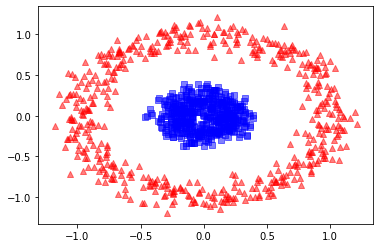

In [29]:
X_pca=pca.fit_transform(X)
plt.scatter(X_pca[y==0,0],X_pca[y==0,1],c='red',marker='^',alpha=0.5)
plt.scatter(X_pca[y==1,0],X_pca[y==1,1],c='blue',marker='s',alpha=0.5)
plt.show()

C:\Users\nsats\Anaconda3\envs\gpu-env\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


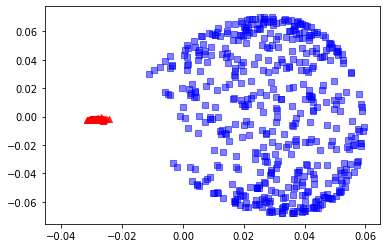

In [30]:
X_kpca=rbf_kernel_pca(X,gamma=15,n_components=2)
plt.scatter(X_kpca[y==0,0],X_kpca[y==0,1],c='red',marker='^',alpha=0.5)
plt.scatter(X_kpca[y==1,0],X_kpca[y==1,1],c='blue',marker='s',alpha=0.5)
plt.show()